In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import json
import time
import multiprocessing as mp
import matplotlib.pyplot as plt

In [ ]:
# 경로 설정
# zdir = r'/zipfiledirectory'
filename = 'payload_gameinfo-20200831-20200906.tsv.gz'

In [ ]:
to_csv = pd.read_csv(filename, delimiter = '\t')[['time', 'info', 'score_info', 'esports_match_id']]
to_csv = to_csv.sort_values(by=['time'], axis = 0)
to_csv = to_csv.reset_index(drop = True)
esports_match_ids = pd.unique(to_csv['esports_match_id'])
# print(esports_match_ids)
# print(type(esports_match_ids))


In [ ]:
start_time = time.time()

for ids in range(len(esports_match_ids)):

    match_df = to_csv[to_csv['esports_match_id'] == esports_match_ids[ids]]
    match_df = match_df.reset_index(drop = True)

    df_info = pd.DataFrame()
    df_score = pd.DataFrame()
    df_team0 = pd.DataFrame()
    df_team1 = pd.DataFrame()
    team_list = ['Home_', 'Away_']

    for i in match_df.index:
        info_json = json.loads(match_df.loc[i, 'info'])
        to_df_info_json = pd.json_normalize(info_json)
        to_df_info_json.index = [i]
        df_info = df_info.append(to_df_info_json, ignore_index = True)

        score_json = json.loads(match_df.loc[i,'score_info'])
        to_df_score_json = pd.json_normalize(score_json)
        to_df_score_json.index = [i]
        df_score = df_score.append(to_df_score_json, ignore_index = True)
        
        to_df_team0_json = pd.json_normalize(score_json['team_info'][0])
        to_df_team0_json = to_df_team0_json.add_prefix(team_list[0])
        to_df_team0_json.index = [i]
        df_team0 = df_team0.append(to_df_team0_json, ignore_index = True)

        to_df_team1_json = pd.json_normalize(score_json['team_info'][1])
        to_df_team1_json = to_df_team1_json.add_prefix(team_list[1])
        to_df_team1_json.index = [i]
        df_team1 = df_team1.append(to_df_team1_json, ignore_index = True)

    match_df = pd.concat([match_df, df_info, df_score, df_team0, df_team1], axis = 1)

    # print(match_df)
    # print(match_df.columns)
    match_df.to_pickle(f'{esports_match_ids[ids]}.pickle')

end_time = time.time()- start_time
print(end_time)


<AxesSubplot:>

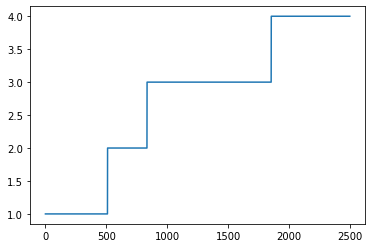

In [8]:
match_df = pd.read_pickle('35546.pickle')

plt.figure()
gh = match_df['esports_ids.esports_match_game_number']
gh.plot()

In [ ]:
import multiproc

start_time = time.time()

# multiprocessing with Pool
if __name__ == '__main__':
    num_cores = mp.cpu_count()
    pool = mp.Pool(processes = num_cores)
    pool.map(multiproc.multiproc, esports_match_ids)
    pool.close()
    pool.join()

end_time = time.time()- start_time
print(end_time)
